In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")



from imblearn.combine import SMOTETomek

#Data Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine Learning 
from sklearn.preprocessing import RobustScaler,StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor,RandomForestClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error, median_absolute_error,r2_score
from sklearn.feature_selection import SelectKBest,f_regression


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("/kaggle/input/superstore-dataset-final/Sample - Superstore.csv",encoding='windows-1254')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
df.shape

(9994, 21)

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.describe(include="object")

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [9]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [10]:
df["Revenue"]=df["Sales"]-df["Profit"]

In [11]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Revenue
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,220.0464
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,512.3580


# ****Data Cleaing****


In [12]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Revenue          0
dtype: int64

In [13]:
df.drop("Row ID",axis=1,inplace=True)

In [14]:
df.set_index("Order ID",inplace=True)

In [15]:
df.head(2)

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Revenue
Order ID,,,,,,,,,,,,,,,,,,,,
CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,220.0464
CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,512.3580


**Change Data type to date time and postal code to object**

In [16]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Revenue'],
      dtype='object')

In [17]:
df[["Order Date","Ship Date"]]=df[["Order Date","Ship Date"]].apply(pd.to_datetime)

df["Postal Code"]=df["Postal Code"].astype("object")

In [18]:
df.head(2)

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Revenue
Order ID,,,,,,,,,,,,,,,,,,,,
CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,220.0464
CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,512.3580


In [19]:
df.dtypes

Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Revenue                 float64
dtype: object

# Which are the top 10 selling products?

In [20]:
sales=df.groupby("Product Name").agg({"Quantity":"sum"}).sort_values("Quantity",ascending=False)[:10]
sales

,Quantity
Product Name,
Staples,215
Staple envelope,170
Easy-staple paper,150
Staples in misc. colors,86
KI Adjustable-Height Table,74
Avery Non-Stick Binders,71
Storex Dura Pro Binders,71
GBC Premium Transparent Covers with Diagonal Lined Pattern,67
"Situations Contoured Folding Chairs, 4/Set",64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Staples'),
  Text(1, 0, 'Staple envelope'),
  Text(2, 0, 'Easy-staple paper'),
  Text(3, 0, 'Staples in misc. colors'),
  Text(4, 0, 'KI Adjustable-Height Table'),
  Text(5, 0, 'Avery Non-Stick Binders'),
  Text(6, 0, 'Storex Dura Pro Binders'),
  Text(7, 0, 'GBC Premium Transparent Covers with Diagonal Lined Pattern'),
  Text(8, 0, 'Situations Contoured Folding Chairs, 4/Set'),
  Text(9, 0, 'Staple-based wall hangings')])

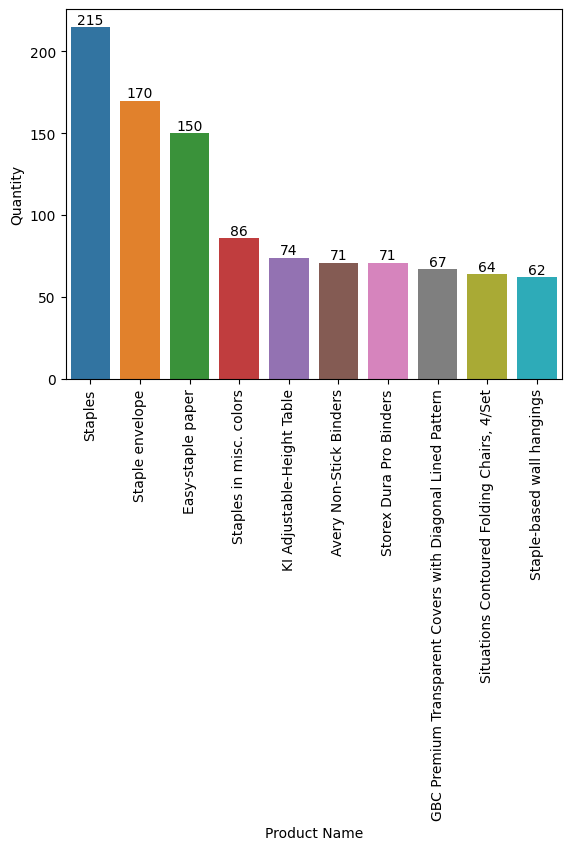

In [21]:
ax=sns.barplot(x="Product Name",y="Quantity",data=sales.reset_index())

for container in ax.containers:
    ax.bar_label(container,color='black',size=10)
plt.xticks(rotation="vertical")

# **Which are the Top 10 products by sales?**

In [22]:
sale=df.groupby("Product Name").agg({"Sales":"sum"}).sort_values("Sales",ascending=False).astype(int)[:10]
sale

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453
Cisco TelePresence System EX90 Videoconferencing Unit,22638
HON 5400 Series Task Chairs for Big and Tall,21870
GBC DocuBind TL300 Electric Binding System,19823
GBC Ibimaster 500 Manual ProClick Binding System,19024
Hewlett Packard LaserJet 3310 Copier,18839
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374
GBC DocuBind P400 Electric Binding System,17965


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(1, 0, 'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind'),
  Text(2, 0, 'Cisco TelePresence System EX90 Videoconferencing Unit'),
  Text(3, 0, 'HON 5400 Series Task Chairs for Big and Tall'),
  Text(4, 0, 'GBC DocuBind TL300 Electric Binding System'),
  Text(5, 0, 'GBC Ibimaster 500 Manual ProClick Binding System'),
  Text(6, 0, 'Hewlett Packard LaserJet 3310 Copier'),
  Text(7, 0, 'HP Designjet T520 Inkjet Large Format Printer - 24" Color'),
  Text(8, 0, 'GBC DocuBind P400 Electric Binding System'),
  Text(9, 0, 'High Speed Automatic Electric Letter Opener')])

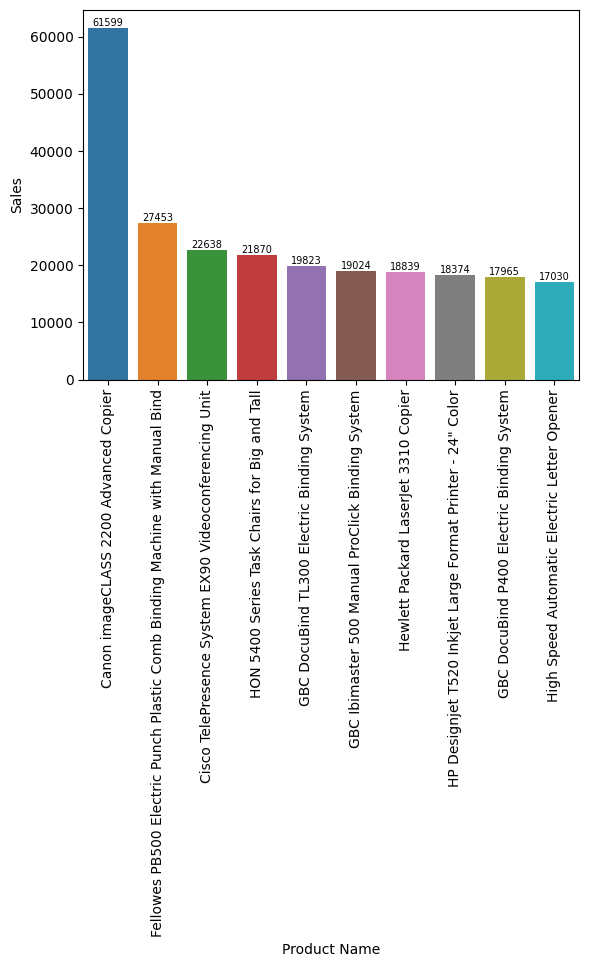

In [23]:
ax=sns.barplot(x="Product Name",y="Sales",data=sale.reset_index())

for container in ax.containers:
    ax.bar_label(container,color='black',size=7)
plt.xticks(rotation="vertical")

# **Which are the most profitable products?**

In [24]:
profitable_products=df.groupby("Product Name").agg({"Profit":"sum"}).sort_values("Profit",ascending=False).astype(int)[:10]
profitable_products

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753
Hewlett Packard LaserJet 3310 Copier,6983
Canon PC1060 Personal Laser Copier,4570
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094
Ativa V4110MDD Micro-Cut Shredder,3772
"3D Systems Cube Printer, 2nd Generation, Magenta",3717
Plantronics Savi W720 Multi-Device Wireless Headset System,3696
Ibico EPK-21 Electric Binding System,3345


# **Which are the most profitable category?**

In [25]:
profitable_category=df.groupby("Category").agg({"Profit":"sum"}).sort_values("Profit",ascending=False)
profitable_category

,Profit
Category,
Technology,145454.9481
Office Supplies,122490.8008
Furniture,18451.2728


# **Which are the most profitable sub-category?**

In [26]:
profitable_subcategory=df.groupby(["Category","Sub-Category"]).sum()
profitable_subcategory

Sales  Quantity  Discount      Profit  \
Category        Sub-Category                                                
Furniture       Bookcases     114879.9963       868     48.14  -3472.5560   
                Chairs        328449.1030      2356    105.00  26590.1663   
                Furnishings    91705.1640      3563    132.40  13059.1436   
                Tables        206965.5320      1241     83.35 -17725.4811   
Office Supplies Appliances    107532.1610      1729     77.60  18138.0054   
                Art            27118.7920      3000     59.60   6527.7870   
                Binders       203412.7330      5974    567.00  30221.7633   
                Envelopes      16476.4020       906     20.40   6964.1767   
                Fasteners       3024.2800       914     17.80    949.5182   
                Labels         12486.3120      1400     25.00   5546.2540   
                Paper          78479.2060      5178    102.60  34053.5693   
                Storage       223843.6080      3158     63.20  21278.8264   
                Supplies       46673.5380       647     14.60  -1189.0995   
Technology      Accessories   167380.3180      2976     60.80  41936.6357   
                Copiers       149528.0300       234     11.00  55617.8249   
                Machines      189238.6310       440     35.20   3384.7569   
                Phones        330007.0540      3289    137.40  44515.7306   

                                  Revenue  
Category        Sub-Category               
Furniture       Bookcases     118352.5523  
                Chairs        301858.9367  
                Furnishings    78646.0204  
                Tables        224691.0131  
Office Supplies Appliances     89394.1556  
                Art            20591.0050  
                Binders       173190.9697  
                Envelopes       9512.2253  
                Fasteners       2074.7618  
                Labels          6940.0580  
                Paper          44425.6367  
                Storage       202564.7816  
                Supplies       47862.6375  
Technology      Accessories   125443.6823  
                Copiers        93910.2051  
                Machines      185853.8741  
                Phones        285491.3234

# **Which are the most selling products in subcategory?**

In [27]:
most_selling_product=df.groupby(["Category","Sub-Category"],as_index=False)["Quantity"].count()
most_selling_product

,Category,Sub-Category,Quantity
0,Furniture,Bookcases,228
1,Furniture,Chairs,617
2,Furniture,Furnishings,957
3,Furniture,Tables,319
4,Office Supplies,Appliances,466
5,Office Supplies,Art,796
6,Office Supplies,Binders,1523
7,Office Supplies,Envelopes,254
8,Office Supplies,Fasteners,217
9,Office Supplies,Labels,364


# **Which customer segments are the most profitable ?**

In [28]:
profitable_cus_segment=df.groupby("Segment").agg({"Profit":"sum"}).sort_values(by="Profit",ascending=False)
profitable_cus_segment

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


# **What shipping modes sold the most products?**

In [29]:
shipping_modes=df.groupby("Ship Mode").agg({"Sales":"count"}).sort_values(by="Sales",ascending=False)
shipping_modes

,Sales
Ship Mode,
Standard Class,5968
Second Class,1945
First Class,1538
Same Day,543


# **Which are the Top 10 City by sales?**

In [30]:
sales_country=df.groupby("City").agg({"Sales":"sum"}).sort_values("Sales",ascending=False)[:10]
sales_country

,Sales
City,
New York City,256368.1610
Los Angeles,175851.3410
Seattle,119540.7420
San Francisco,112669.0920
Philadelphia,109077.0130
Houston,64504.7604
Chicago,48539.5410
San Diego,47521.0290
Jacksonville,44713.1830


# **Create a pie chart with the 10 State that have the most sales**

(-1.25, 1.25, -1.25, 1.25)

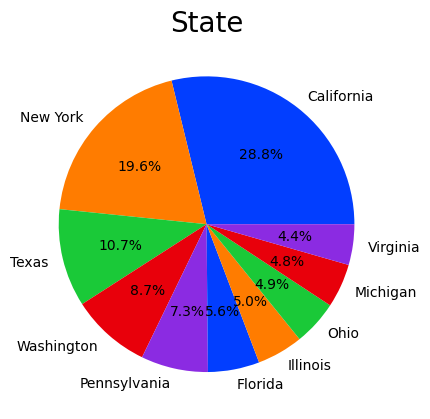

In [31]:
state=df.groupby("State").sum()["Sales"].sort_values(ascending=False)[:10]
labels=state.index

colors = sns.color_palette('bright')[0:5]
plt.pie(state,colors=colors,  labels = labels,autopct='%1.1f%%')
plt.title('State', fontsize = 20)
plt.axis('off')


 # **Who are the top-10 most profitable customers?**

In [32]:
customer=df.sort_values("Profit",ascending=False)[:10][["Customer ID","Customer Name","Profit"]]
customer

,Customer ID,Customer Name,Profit
Order ID,,,
CA-2016-118689,TC-20980,Tamara Chand,8399.9760
CA-2017-140151,RB-19360,Raymond Buch,6719.9808
CA-2017-166709,HL-15040,Hunter Lopez,5039.9856
CA-2016-117121,AB-10105,Adrian Barton,4946.3700
CA-2014-116904,SC-20095,Sanjit Chand,4630.4755
CA-2017-127180,TA-21385,Tom Ashbrook,3919.9888
CA-2015-145352,CM-12385,Christopher Martinez,3177.4750
CA-2016-158841,SE-20110,Sanjit Engle,2799.9840
US-2016-140158,DR-12940,Daniel Raglin,2591.9568


# **Add a new column (Month and Year)**

In [33]:
df["month"]=df["Order Date"].dt.month
df["year"]=df["Order Date"].dt.year
df.head(2)

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Revenue,month,year
Order ID,,,,,,,,,,,,,,,,,,,,,
CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,220.0464,11,2016
CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,512.3580,11,2016


# **Total sales values by year and month**

In [34]:
year_month_sales=df.groupby(["year","month"]).sum()
year_month_sales

Sales  Quantity  Discount      Profit      Revenue
year month                                                          
2014 1       14236.8950       284     10.00   2450.1907   11786.7043
     2        4519.8920       159      8.10    862.3084    3657.5836
     3       55691.0090       585     26.30    498.7299   55192.2791
     4       28295.3450       536     14.85   3488.8352   24806.5098
     5       23648.2870       466     18.95   2738.7096   20909.5774
     6       34595.1276       521     23.22   4976.5244   29618.6032
     7       33946.3930       550     24.55   -841.4826   34787.8756
     8       27909.4685       609     20.05   5318.1050   22591.3635
     9       81777.3508      1000     42.87   8328.0994   73449.2514
     10      31453.3930       573     25.45   3448.2573   28005.1357
     11      78628.7167      1219     48.07   9292.1269   69336.5898
     12      69545.6205      1079     53.05   8983.5699   60562.0506
2015 1       18174.0756       236     10.32  -3281.0070   21455.0826
     2       11951.4110       239      8.30   2813.8508    9137.5602
     3       38726.2520       515     19.34   9732.0978   28994.1542
     4       34195.2085       543     28.15   4187.4962   30007.7123
     5       30131.6865       575     24.25   4667.8690   25463.8175
     6       24797.2920       486     23.80   3335.5572   21461.7348
     7       28765.3250       557     23.85   3288.6483   25476.6767
     8       36898.3322       598     24.87   5355.8084   31542.5238
     9       64595.9180      1086     41.30   8209.1627   56386.7553
     10      31404.9235       631     26.95   2817.3660   28587.5575
     11      75972.5635      1310     52.59  12474.7884   63497.7751
     12      74919.5212      1203     43.37   8016.9659   66902.5553
2016 1       18542.4910       358     11.80   2824.8233   15717.6677
     2       22978.8150       306      8.00   5004.5795   17974.2355
     3       51715.8750       579     31.12   3611.9680   48103.9070
     4       38750.0390       635     26.50   2977.8149   35772.2241
     5       56987.7280       863     41.50   8662.1464   48325.5816
     6       40344.5340       742     27.60   4750.3781   35594.1559
     7       39261.9630       758     32.05   4432.8779   34829.0851
     8       31115.3743       693     32.67   2062.0693   29053.3050
     9       73410.0249      1316     54.24   9328.6576   64081.3673
     10      59687.7450       767     28.85  16243.1425   43444.6025
     11      79411.9658      1406     58.32   4011.4075   75400.5583
     12      96999.0430      1414     47.67  17885.3093   79113.7337
2017 1       43971.3740       597     25.00   7140.4391   36830.9349
     2       20301.1334       363     19.47   1613.8720   18687.2614
     3       58872.3528       885     31.14  14751.8915   44120.4613
     4       36521.5361       733     39.47    933.2900   35588.2461
     5       44261.1102       887     36.89   6342.5828   37918.5274
     6       52981.7257       931     42.12   8223.3357   44758.3900
     7       45264.4160       840     31.65   6952.6212   38311.7948
     8       63120.8880       884     31.30   9040.9557   54079.9323
     9       87866.6520      1660     67.65  10991.5556   76875.0964
     10      77776.9232      1133     51.92   9275.2755   68501.6477
     11     118447.8250      1840     73.89   9690.1037  108757.7213
     12      83829.3188      1723     67.72   8483.3468   75345.9720

# **Total sales chart by the year**

(array([0, 1, 2, 3]),
 [Text(0, 0, '2014'),
  Text(1, 0, '2015'),
  Text(2, 0, '2016'),
  Text(3, 0, '2017')])

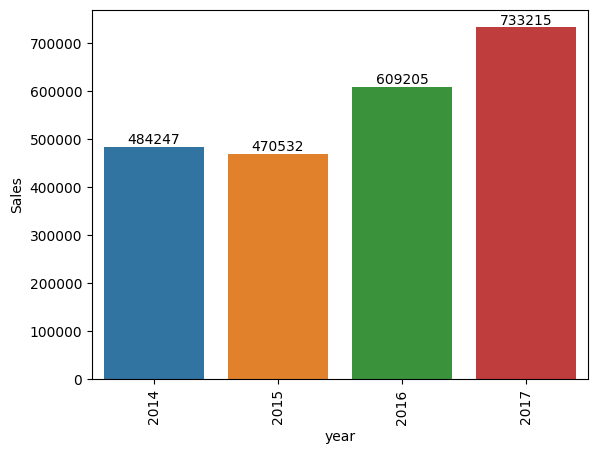

In [35]:
year_sale=df.groupby("year").agg({"Sales":"sum"}).sort_values("Sales",ascending=False).astype(int)
   
    
ax=sns.barplot(x="year",y="Sales",data=year_sale.reset_index())

for container in ax.containers:
    ax.bar_label(container,color='black',size=10)
plt.xticks(rotation="vertical")

# **Profit vs Discount**

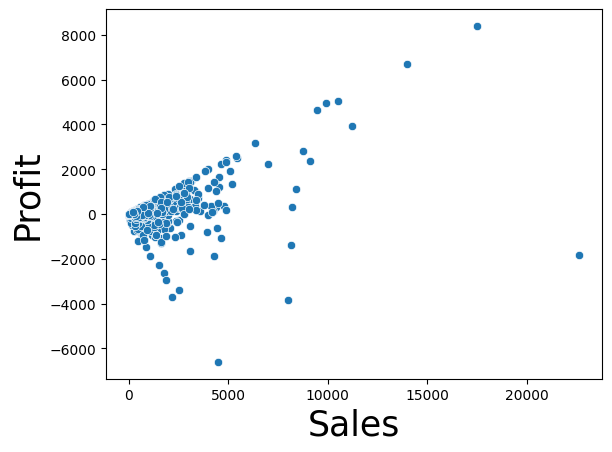

In [36]:
ax=sns.scatterplot(x=df["Sales"],y=df["Profit"],data=df)
ax.set_xlabel("Sales",fontsize=25)
ax.set_ylabel("Profit",fontsize=25)
plt.show()

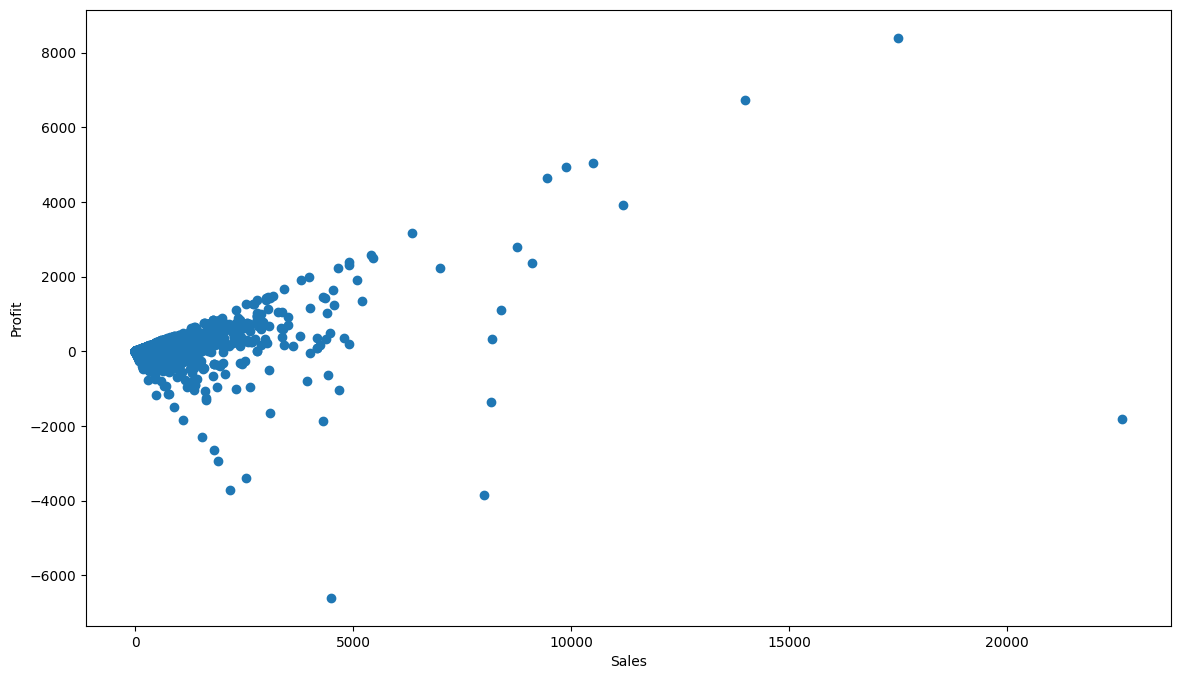

In [37]:
fig,ax = plt.subplots(figsize=(14,8))
ax.scatter(df['Sales'],df['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

# **Profit Vs Discount**

<AxesSubplot: xlabel='Discount', ylabel='Profit'>

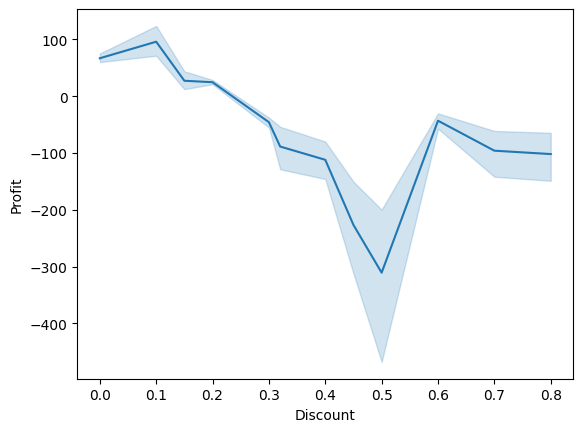

In [38]:
sns.lineplot(x="Discount",y="Profit",data=df)


Text(0, 0.5, 'Profit/Loss and sales')

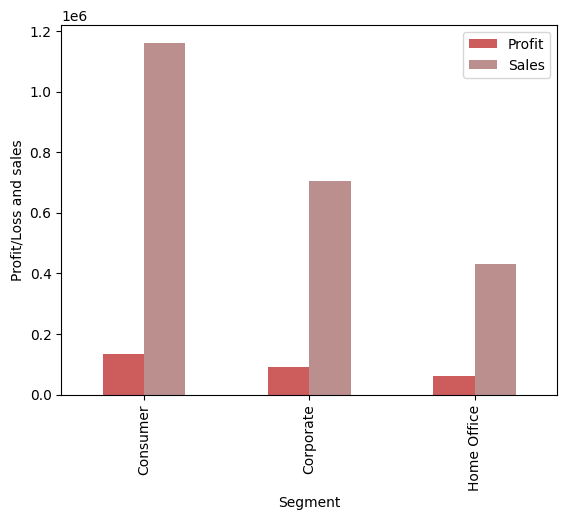

In [39]:
df.groupby("Segment")[["Profit","Sales"]].sum().plot.bar(color=["#CD5C5C","#BC8F8F"])

plt.ylabel("Profit/Loss and sales")

# **Profit/loss & Sales across states**

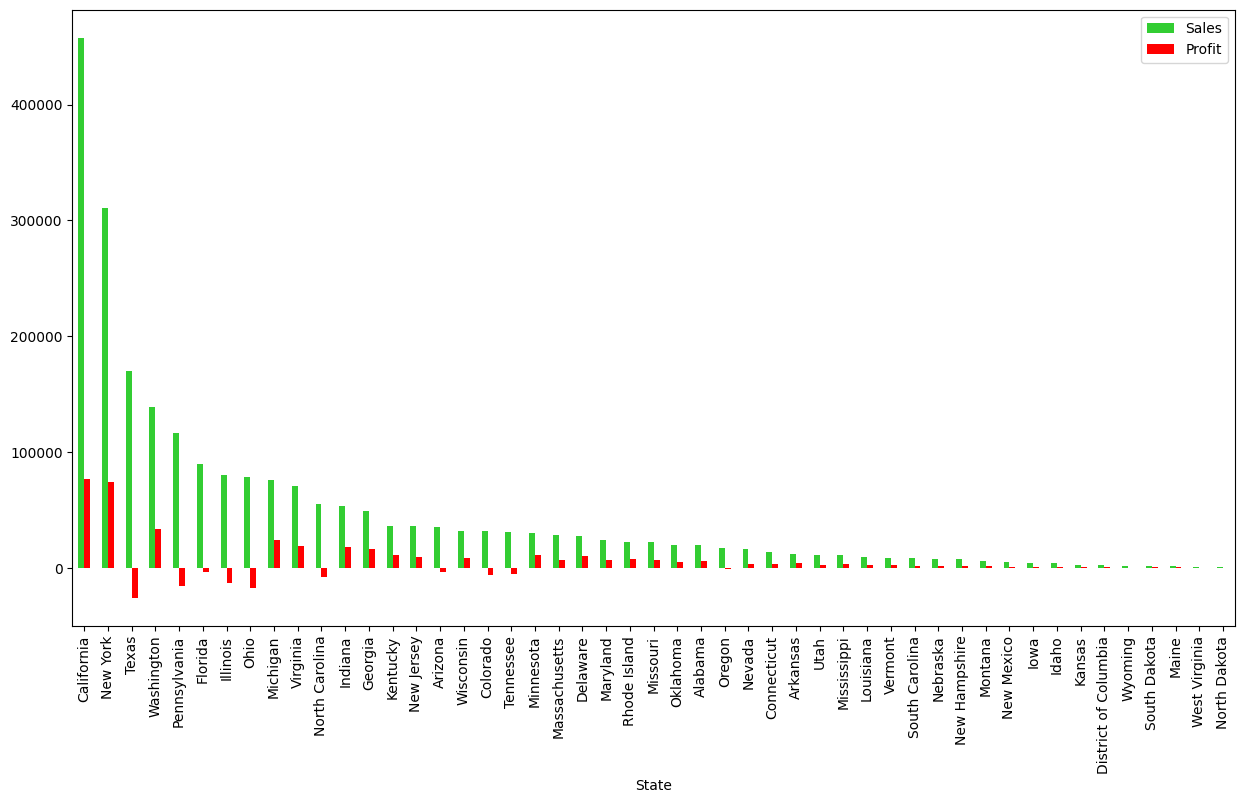

In [40]:
state_details=df.groupby('State')[["Sales","Profit"]].sum().sort_values(by="Sales",ascending=False).plot.bar(color=['#32CD32',"#FF0000"],figsize=(15,8))


In [41]:
df.head(2)

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Revenue,month,year
Order ID,,,,,,,,,,,,,,,,,,,,,
CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,220.0464,11,2016
CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,512.3580,11,2016


In [42]:
df["Status"]=np.where(df["Profit"]>0,"Profit",np.where(df["Profit"]<0,"Loss","B/E"))

In [43]:
df.head(10)

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Revenue,month,year,Status
Order ID,,,,,,,,,,,,,,,,,,,,,
CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,220.0464,11,2016,Profit
CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,512.3580,11,2016,Profit
CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.7486,6,2016,Profit
US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1340.6085,10,2015,Loss
US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,19.8516,10,2015,Profit
CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,...,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,34.6906,6,2014,Profit
CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,...,Art,Newell 322,7.2800,4,0.00,1.9656,5.3144,6,2014,Profit
CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,...,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,816.4368,6,2014,Profit
CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,...,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,12.7215,6,2014,Profit


# **Features Scaling**

In [44]:
pipeline=Pipeline([
    ("robust_scaler",RobustScaler()),
    ("std_scaler",StandardScaler())
])

In [45]:
to_be_processed=df.select_dtypes(include=["float64","int64"]).drop(columns={"Profit","month","year"})

to_be_processed.columns

Index(['Sales', 'Quantity', 'Discount', 'Revenue'], dtype='object')

In [46]:
for col in to_be_processed.columns:
    df[col]=pipeline.fit_transform(np.array(df[col]).reshape(-1,1))
    
df.head(5)

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Revenue,month,year,Status
Order ID,,,,,,,,,,,,,,,,,,,,,
CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,Bookcases,Bush Somerset Collection Bookcase,0.051510,-0.804303,-0.756643,41.9136,0.034214,11,2016,Profit
CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",0.805633,-0.354865,-0.756643,219.5820,0.564906,11,2016,Profit
CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,...,Labels,Self-Adhesive Address Labels for Typewriters b...,-0.345368,-0.804303,-0.756643,6.8714,-0.351213,6,2016,Profit
US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,Tables,Bretford CR4500 Series Slim Rectangular Table,1.167688,0.544012,1.423149,-383.0310,2.068596,10,2015,Loss
US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,Storage,Eldon Fold 'N Roll Cart System,-0.332935,-0.804303,0.212153,2.5164,-0.329240,10,2015,Profit


# **Encoding categorical data to numeric data**

In [47]:
df.drop(["Country",'Customer ID','Product ID', 'Customer Name','Product ID'],axis=1,inplace=True)

In [48]:
df.drop("Product Name",axis=1,inplace=True)

In [49]:
df.drop(["Order Date","Ship Date"],axis=1,inplace=True)

In [50]:
le=LabelEncoder()
cat_data=df.select_dtypes(include="object").drop(columns={"Status",})
for col in cat_data.columns:
    df[col]=le.fit_transform(df[col])


In [51]:
df

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Revenue,month,year,Status
Order ID,,,,,,,,,,,,,,,,
CA-2016-152156,2,0,194,15,217,2,0,4,0.051510,-0.804303,-0.756643,41.9136,0.034214,11,2016,Profit
CA-2016-152156,2,0,194,15,217,2,0,5,0.805633,-0.354865,-0.756643,219.5820,0.564906,11,2016,Profit
CA-2016-138688,2,1,266,3,517,3,1,10,-0.345368,-0.804303,-0.756643,6.8714,-0.351213,6,2016,Profit
US-2015-108966,3,0,153,8,170,2,0,16,1.167688,0.544012,1.423149,-383.0310,2.068596,10,2015,Loss
US-2015-108966,3,0,153,8,170,2,1,14,-0.332935,-0.804303,0.212153,2.5164,-0.329240,10,2015,Profit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CA-2014-110422,2,0,295,8,169,2,0,9,-0.328314,-0.354865,0.212153,4.1028,-0.326892,1,2014,Profit
CA-2017-121258,3,0,104,3,555,3,0,9,-0.221269,-0.804303,-0.756643,15.6332,-0.226710,2,2017,Profit
CA-2017-121258,3,0,104,3,555,3,2,13,0.046080,-0.804303,0.212153,19.3932,0.068956,2,2017,Profit


In [52]:
Xt=df.drop(columns={"Status"})

yt=df["Status"]

Xt.shape,yt.shape

((9994, 15), (9994,))

# **Data Balancing**

In [53]:
smt=SMOTETomek(random_state=10)
smt

SMOTETomek(random_state=10)

In [54]:
X_res,y_res = smt.fit_resample(Xt,yt)
X_res.shape,y_res.shape

((24164, 15), (24164,))

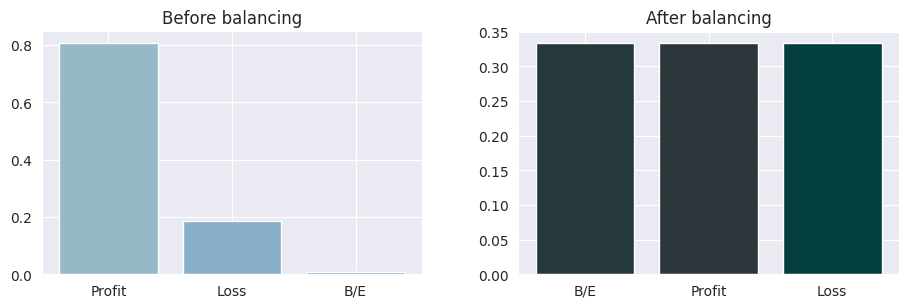

In [55]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(yt.value_counts(normalize=True).index,
        yt.value_counts(normalize=True).values,
       color=["#95B9C7","#87AFC7","#659EC7"])
plt.title("Before balancing")

plt.subplot(1,2,2)
plt.bar(y_res.value_counts(normalize=True).index,
        y_res.value_counts(normalize=True).values,
       color=["#25383C","#2C3539","#033E3E"])
plt.title("After balancing")

plt.tight_layout(pad=4)
plt.show()

# **Features and labels**

In [56]:
#Feature
X=X_res.drop(columns={"Profit"})

#Labels

y=X_res["Profit"]

X.shape,y.shape

((24164, 14), (24164,))

# **Splitting the data into training data and testing data**

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=10)

# Model Selection

* Selecting regression model
# Linear Regression 

* Linear Regression model

In [58]:
linearR_model = LinearRegression()
linearR_model.fit(X_train,y_train)

LinearRegression()

In [59]:
y_pred = linearR_model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))


4.7780059330607e-13
